In [1]:
import pandas as pd
import numpy as np

In [2]:
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

student_number = list(range(1, len(students) + 1))
shoe_sizes = np.random.choice(np.arange(6, 14, 0.5), len(students))
side_of_classroom = np.random.choice(['left', 'right'], len(students))
favorite_number = np.random.randint(1, 11, len(students))

In [3]:
students = pd.DataFrame({'student_name': students,
                         'student_number': student_number,
                         'show_size': shoe_sizes,
                         'favorite_number': favorite_number})

In [4]:
students

,student_name,student_number,show_size,favorite_number
0,Sally,1,6.5,5
1,Jane,2,10.0,10
2,Suzie,3,6.0,7
3,Billy,4,6.0,1
4,Ada,5,10.5,10
5,John,6,12.5,8
6,Thomas,7,10.5,8
7,Marie,8,12.0,4
8,Albert,9,8.0,10
9,Richard,10,11.0,10


Print out the shape of the data frame.

Print out the names of the columns in the data frame.

Rename 2 of the columns in your data frame.

Create a new data frame based on the one you have. The new data frame should only have columns for shoe size and side of the classroom.

Create a new data frame that has all of the columns, but only 5 rows.

Create a new data frame that has only columns for favorite number and name, and only includes 7 rows.

Create a new column for the ratio of shoe size to the favorite number. Name this ss_to_fn

Create a new column that contains the z-score for the shoe size.

Transform the side_of_the_classroom columns such that the values are either R or L.

Find the names of all the students that have a shoe size greater than the 3rd quartile of shoe sizes (You can use the .quantile method on a series for this)

Find the names of all the students that have a shoe size less than the 1st quartile of shoe sizes

In [5]:
students.shape

(12, 4)

In [6]:
students.columns

Index(['student_name', 'student_number', 'show_size', 'favorite_number'], dtype='object')

In [7]:
students.rename(index=str, columns={'student_name': 'student', 'show_size': 'shoe_size', 'student_number': 'student_no'})

,student,student_no,shoe_size,favorite_number
0,Sally,1,6.5,5
1,Jane,2,10.0,10
2,Suzie,3,6.0,7
3,Billy,4,6.0,1
4,Ada,5,10.5,10
5,John,6,12.5,8
6,Thomas,7,10.5,8
7,Marie,8,12.0,4
8,Albert,9,8.0,10
9,Richard,10,11.0,10


In [8]:
students

,student_name,student_number,show_size,favorite_number
0,Sally,1,6.5,5
1,Jane,2,10.0,10
2,Suzie,3,6.0,7
3,Billy,4,6.0,1
4,Ada,5,10.5,10
5,John,6,12.5,8
6,Thomas,7,10.5,8
7,Marie,8,12.0,4
8,Albert,9,8.0,10
9,Richard,10,11.0,10


In [9]:
students.columns = ('student', 'student_no', 'shoe_size', 'fav_number')

In [10]:
students

,student,student_no,shoe_size,fav_number
0,Sally,1,6.5,5
1,Jane,2,10.0,10
2,Suzie,3,6.0,7
3,Billy,4,6.0,1
4,Ada,5,10.5,10
5,John,6,12.5,8
6,Thomas,7,10.5,8
7,Marie,8,12.0,4
8,Albert,9,8.0,10
9,Richard,10,11.0,10


In [11]:
size_side = pd.DataFrame({'shoe_size': shoe_sizes,
                          'side_of_classroom': side_of_classroom})

In [12]:
size_side

,shoe_size,side_of_classroom
0,6.5,right
1,10.0,right
2,6.0,right
3,6.0,right
4,10.5,right
5,12.5,right
6,10.5,left
7,12.0,left
8,8.0,left
9,11.0,left


In [13]:
students.head()

,student,student_no,shoe_size,fav_number
0,Sally,1,6.5,5
1,Jane,2,10.0,10
2,Suzie,3,6.0,7
3,Billy,4,6.0,1
4,Ada,5,10.5,10


In [14]:
students[['student', 'fav_number']].head(7)

,student,fav_number
0,Sally,5
1,Jane,10
2,Suzie,7
3,Billy,1
4,Ada,10
5,John,8
6,Thomas,8


In [15]:
size_side

,shoe_size,side_of_classroom
0,6.5,right
1,10.0,right
2,6.0,right
3,6.0,right
4,10.5,right
5,12.5,right
6,10.5,left
7,12.0,left
8,8.0,left
9,11.0,left


In [16]:
z_score = (size_side.shoe_size - size_side.shoe_size.mean()) / size_side.shoe_size.std()
size_side['ss_to_fn'] = z_score

In [17]:
size_side

,shoe_size,side_of_classroom,ss_to_fn
0,6.5,right,-1.107948
1,10.0,right,0.323862
2,6.0,right,-1.312492
3,6.0,right,-1.312492
4,10.5,right,0.528406
5,12.5,right,1.346583
6,10.5,left,0.528406
7,12.0,left,1.142039
8,8.0,left,-0.494315
9,11.0,left,0.732950


In [18]:
size_side.side_of_classroom.str.replace('left', 'L').replace('right', 'R')

0     R
1     R
2     R
3     R
4     R
5     R
6     L
7     L
8     L
9     L
10    R
11    R
Name: side_of_classroom, dtype: object

In [19]:
replacements = ({'left': 'L',
                 'right': 'R'})
size_side.replace(replacements, inplace=True)

In [20]:
size_side

,shoe_size,side_of_classroom,ss_to_fn
0,6.5,R,-1.107948
1,10.0,R,0.323862
2,6.0,R,-1.312492
3,6.0,R,-1.312492
4,10.5,R,0.528406
5,12.5,R,1.346583
6,10.5,L,0.528406
7,12.0,L,1.142039
8,8.0,L,-0.494315
9,11.0,L,0.732950


In [21]:
# students[['student', 'shoe_size'[students.shoe_size > shoe_size.quantile(3)]]]

In [22]:
students[students.shoe_size > students.shoe_size.quantile(.75)]

,student,student_no,shoe_size,fav_number
5,John,6,12.5,8
7,Marie,8,12.0,4


In [23]:
students[students.shoe_size < students.shoe_size.quantile(.25)]

,student,student_no,shoe_size,fav_number
2,Suzie,3,6.0,7
3,Billy,4,6.0,1


In [24]:
s_mean = students[['shoe_size', 'fav_number']].mean()

In [25]:
s_min = students[['shoe_size', 'fav_number']].min()

In [26]:
s_median = students[['shoe_size', 'fav_number']].median()

In [27]:
s_max = students[['shoe_size', 'fav_number']].max()

In [28]:
students.groupby('fav_number')

In [29]:
students.sort_values(by='student').sort_values(by='fav_number')

,student,student_no,shoe_size,fav_number
3,Billy,4,6.0,1
7,Marie,8,12.0,4
0,Sally,1,6.5,5
10,Isaac,11,11.0,7
2,Suzie,3,6.0,7
5,John,6,12.5,8
6,Thomas,7,10.5,8
4,Ada,5,10.5,10
11,Alan,12,6.5,10
8,Albert,9,8.0,10


In [30]:
side_r = size_side[['side_of_classroom']]

In [31]:
students['side'] = side_r

In [32]:
students

,student,student_no,shoe_size,fav_number,side
0,Sally,1,6.5,5,R
1,Jane,2,10.0,10,R
2,Suzie,3,6.0,7,R
3,Billy,4,6.0,1,R
4,Ada,5,10.5,10,R
5,John,6,12.5,8,R
6,Thomas,7,10.5,8,L
7,Marie,8,12.0,4,L
8,Albert,9,8.0,10,L
9,Richard,10,11.0,10,L


In [33]:
students[['side', 'shoe_size']].groupby('side').agg(['mean'])

,shoe_size
,mean
side,
L,10.375
R,8.625


In [34]:
side_count = students[['side', 'fav_number']].groupby('side').count().rename(columns={'fav_number': 'count'})
side_count.plot.pie(y='count')

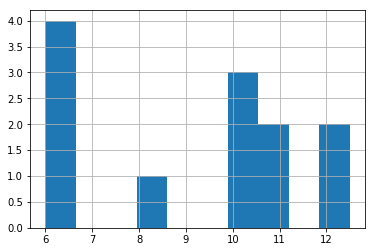

In [42]:
students['shoe_size'].hist()

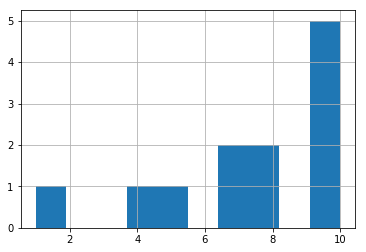

In [43]:
students['fav_number'].hist()

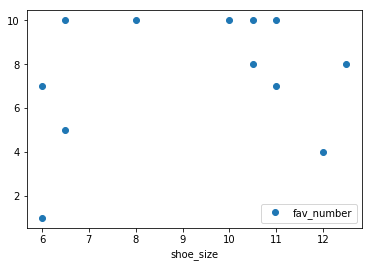

In [45]:
students.plot(x='shoe_size', y='fav_number', style='o')

In [48]:
students.to_csv('students.csv', index=False)

In [49]:
pd.read_csv('students.csv')

,student,student_no,shoe_size,fav_number,side
0,Sally,1,6.5,5,R
1,Jane,2,10.0,10,R
2,Suzie,3,6.0,7,R
3,Billy,4,6.0,1,R
4,Ada,5,10.5,10,R
5,John,6,12.5,8,R
6,Thomas,7,10.5,8,L
7,Marie,8,12.0,4,L
8,Albert,9,8.0,10,L
9,Richard,10,11.0,10,L


In [51]:
profiles_json_df = pd.read_json('profiles.json')

In [52]:
profiles_json_df

,_id,about,address,age,balance,company,email,eyeColor,favoriteFruit,friends,...,guid,index,isActive,latitude,longitude,name,phone,picture,registered,tags
0,54e23c3e46ab53a440b580e8,Sit cillum deserunt irure laboris tempor fugia...,"121 Emmons Avenue, Klondike, Kentucky, 5975",39,"$2,097.02",ANDRYX,hebertestes@andryx.com,blue,strawberry,"[{'id': 0, 'name': 'Tanisha Leonard'}, {'id': ...",...,9962b468-ef3e-4993-b677-617469bc3008,0,False,-80.157843,161.930160,Hebert Estes,+1 (866) 456-2268,http://placehold.it/32x32,2014-11-10T01:44:03 +06:00,"[sit, occaecat, non, ea, sit, laboris, exercit..."
1,54e23c3ef5cc0d250968c212,Esse quis cillum sunt occaecat ad et eu incidi...,"724 Brevoort Place, Lodoga, Indiana, 3880",30,"$3,654.02",PHARMACON,allisonwynn@pharmacon.com,green,apple,"[{'id': 0, 'name': 'Curry Cox'}, {'id': 1, 'na...",...,905f849d-49bf-4a57-b4f3-5d6e4bf1b04c,1,False,55.737207,-167.177561,Allison Wynn,+1 (926) 525-3131,http://placehold.it/32x32,2014-06-10T13:41:26 +05:00,"[enim, officia, laboris, irure, veniam, occaec..."
2,54e23c3e09cc6875638cd36b,Deserunt adipisicing proident exercitation cil...,"941 Cox Place, Bluffview, Georgia, 5882",31,"$1,536.02",QUONK,jacobsfloyd@quonk.com,brown,banana,"[{'id': 0, 'name': 'Robles Chan'}, {'id': 1, '...",...,1b042d48-9cfa-4db5-8b60-4104165591c3,2,True,30.215667,68.831905,Jacobs Floyd,+1 (853) 537-3315,http://placehold.it/32x32,2014-07-30T03:17:32 +05:00,"[est, aute, laborum, sint, anim, sit, consecte..."
3,54e23c3e54e4094147a3b1da,Aliqua sunt exercitation quis cupidatat fugiat...,"518 Randolph Street, Whitestone, Arizona, 8189",20,"$3,919.64",INRT,fayhammond@inrt.com,green,banana,"[{'id': 0, 'name': 'Dudley Booker'}, {'id': 1,...",...,69eb3454-8acc-46f1-a636-c6df00dfb542,3,False,33.825844,-65.969538,Fay Hammond,+1 (922) 429-2592,http://placehold.it/32x32,2015-01-30T08:05:38 +06:00,"[aliqua, esse, sint, pariatur, commodo, do, anim]"
4,54e23c3e177caf5567ba87ac,Irure excepteur consequat esse qui tempor dese...,"604 Just Court, Eastvale, Federated States Of ...",39,"$3,681.39",WAZZU,chasitymarsh@wazzu.com,green,apple,"[{'id': 0, 'name': 'Kristina Glover'}, {'id': ...",...,97962c85-7700-4ffa-a01e-2fcbc147fd81,4,False,-31.660978,37.559095,Chasity Marsh,+1 (976) 425-2362,http://placehold.it/32x32,2014-07-31T06:03:19 +05:00,"[aliquip, duis, irure, amet, aliquip, dolore, ..."
5,54e23c3eaffbb506aa15ec1c,Qui ad commodo elit voluptate cupidatat exerci...,"101 Haring Street, Nicut, Louisiana, 1473",30,"$1,694.42",EARTHWAX,camachocortez@earthwax.com,brown,apple,"[{'id': 0, 'name': 'Sexton Tillman'}, {'id': 1...",...,fc3e04d1-44c2-449e-891a-d4f8053d14a4,5,True,74.434627,69.527088,Camacho Cortez,+1 (869) 528-2019,http://placehold.it/32x32,2014-03-17T12:04:00 +05:00,"[et, sit, in, id, ullamco, elit, laborum]"
6,54e23c3e0fd8074c2ca52667,Minim consequat anim ad et tempor et pariatur ...,"569 Oakland Place, Beyerville, Puerto Rico, 2395",35,"$1,214.10",TERSANKI,averyflynn@tersanki.com,green,banana,"[{'id': 0, 'name': 'Ball Henson'}, {'id': 1, '...",...,af8d9a03-fde9-4039-b20c-c4708d4cfc3c,6,False,-89.879409,143.441709,Avery Flynn,+1 (966) 404-2471,http://placehold.it/32x32,2014-04-13T10:25:03 +05:00,"[quis, esse, Lorem, minim, nostrud, voluptate,..."
7,54e23c3eb112d96e4204914d,Minim proident minim consectetur nostrud dolor...,"808 Duryea Court, Downsville, Northern Mariana...",23,"$2,930.31",ORBIXTAR,michaelcash@orbixtar.com,blue,strawberry,"[{'id': 0, 'name': 'Rodgers Nolan'}, {'id': 1,...",...,95f1c020-f9eb-4a29-b236-e766759d89d0,7,False,-86.621367,-4.061970,Michael Cash,+1 (996) 439-3660,http://placehold.it/32x32,2014-05-24T17:56:54 +05:00,"[eu, sit, dolore, culpa, Lorem, in, esse]"
8,54e23c3ef30f14d0e5afddf3,Ullamco ea esse ullamco commodo quis amet ut a...,"684 Stratford Road, Rosine, District Of Columb...",25,"$1,944.15",KIDSTOCK,madeleinebray@kidstock.com,green,strawberry,"[{'id': 0, 'name': 'Herrera Doyle'}, {'id': 1,...",...,bde2d56f-2488-40d0-a7d2-21019ee8a18b,8,False,45.118798,-7.698707,Madele

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
students

,student,student_no,shoe_size,fav_number,side
0,Sally,1,6.5,5,R
1,Jane,2,10.0,10,R
2,Suzie,3,6.0,7,R
3,Billy,4,6.0,1,R
4,Ada,5,10.5,10,R
5,John,6,12.5,8,R
6,Thomas,7,10.5,8,L
7,Marie,8,12.0,4,L
8,Albert,9,8.0,10,L
9,Richard,10,11.0,10,L


In [36]:
side_count

,count
side,
L,4
R,8


In [37]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

from env import user, host, pw

In [53]:
import pandas as pd
conn = get_connection('numbers', user, host, pw)

In [54]:
pd.read_sql('SELECT * from numbers', conn)

,n
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [55]:
from pydataset import data

ModuleNotFoundError: No module named 'pydataset'